In [1]:
import popsims
import numpy as np
import pandas as pd
import splat
import popsims
from astropy.coordinates import SkyCoord, Galactic
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#sns.set_style("darkgrid", {"axes.facecolor": ".95"})

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

from  matplotlib.colors import Normalize
import astropy.units as u
import popsims
import matplotlib
from tqdm import tqdm
from tqdm import tqdm
import matplotlib as mpl 
from popsims.abs_mags import get_abs_mag
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] =20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['figure.titlesize'] = 20

splat.initializeStandards(all=True)

%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
def group_by_spt(spts, values, grid= np.arange(15, 41)):
    res=np.ones_like(grid)*np.nan
    std=np.ones_like(grid)*np.nan
    for idx, g in enumerate(grid):
        if idx < len(grid)-1:
            bools=np.logical_and(spts>=grid[idx], spts<grid[idx+1])
        else:
            bools=spts>=grid[-1]
        np.place(res, grid==[grid[idx]], np.nanmedian(values[bools]) )
        np.place(std, grid==[grid[idx]], np.nanstd(values[bools]))
    return {'grid': grid, 'median': res, 'std': std}

In [3]:
popsims.abs_mags.make_mamajek_fit(np.arange(15, 41))[1][0]

array([ 8.67  ,  9.675 ,  9.9455, 10.56  , 10.781 , 11.05  , 11.34  ,
       11.47  , 11.93  , 12.03  , 12.47  , 12.91  , 13.24  , 13.26  ,
       13.28  , 13.3   , 13.45  , 13.46  , 13.77  , 14.32  , 14.82  ,
       15.51  , 15.77  , 17.04  , 19.57  ,     nan])

In [4]:
vals=popsims.make_systems(bfraction=0.2)

In [5]:
#mass functuin and mass ratio distributin

In [6]:
#

[Text(0.5, 0, 'Mass Ratio')]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


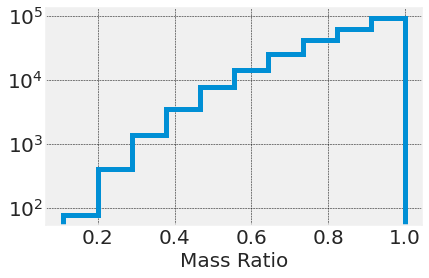

In [7]:
fig, ax=plt.subplots()
h=plt.hist(vals.sec_mass/vals.pri_mass,  histtype='step', lw=5,  log=True)
ax.set(xlabel='Mass Ratio')

In [8]:
#fig, 

[Text(0.5, 0, 'SpT ')]

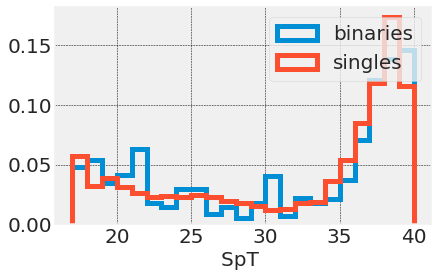

In [9]:
fig, ax=plt.subplots()
h=plt.hist(vals['spt'][vals.is_binary], density=True,  range=[17, 40], \
           histtype='step', bins=23, lw=5,  label='binaries')
h=plt.hist(vals['spt'][~vals.is_binary], bins=23, density=True, range=[17, 40], histtype='step', lw=5,\
          label='singles')
ax.legend()
ax.set(xlabel='SpT ')

[Text(0.5, 0, 'Teff'), (400.0, 3000.0)]

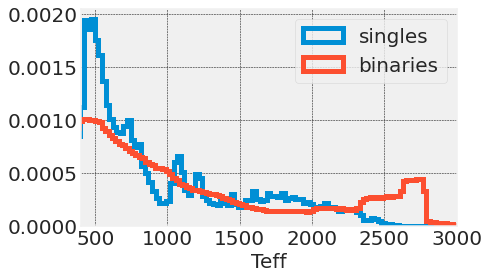

In [10]:
fig, ax=plt.subplots()
h=plt.hist(vals['temperature'][vals.is_binary], density=True,  \
           histtype='step', bins='auto', lw=5, range=[200, 3000], label='singles')
h=plt.hist(vals['temperature'][~vals.is_binary],bins='auto', range=[200, 3000] , density=True, histtype='step', lw=5,\
          label='binaries')
ax.legend()
ax.set(xlabel='Teff', xlim=[400, 3000])

[Text(0.5, 0, 'J mag ')]

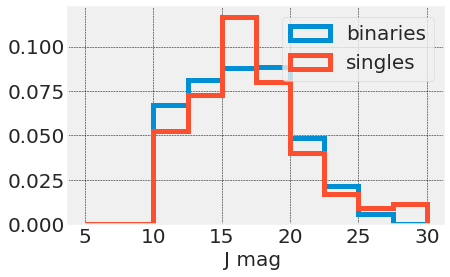

In [11]:
fig, ax=plt.subplots()
h=plt.hist(vals['abs_2MASS_H'][vals.is_binary], density=True,  range=[5, 30],\
           histtype='step', lw=5, label='binaries' )
h=plt.hist(vals['abs_2MASS_H'][~vals.is_binary], density=True, range=[5, 30], \
           histtype='step', lw=5, label='singles' )
ax.legend()
ax.set(xlabel='J mag ')

[Text(0, 0.5, 'Teff'), Text(0.5, 0, 'SpT')]

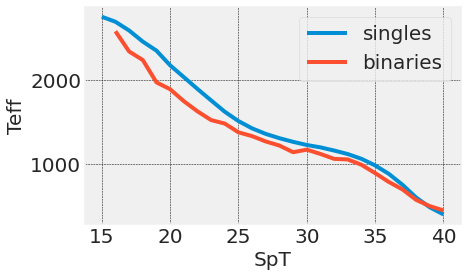

In [12]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.spt[~vals.is_binary],vals.temperature[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.temperature[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles')
ax.errorbar(bins['grid'], bins['median'],  label='binaries')
ax.legend()
ax.set(ylabel='Teff', xlabel='SpT')

In [13]:
binaries=vals[vals.is_binary]

[Text(0, 0.5, 'Teff'), Text(0.5, 0, 'H mag')]

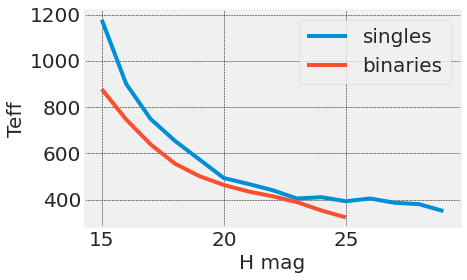

In [14]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.abs_2MASS_H[~vals.is_binary],vals.temperature[~vals.is_binary])
bins=group_by_spt(vals.abs_2MASS_H[vals.is_binary], vals.temperature[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles')
ax.errorbar(bins['grid'], bins['median'],  label='binaries')
ax.legend()
ax.set(ylabel='Teff', xlabel='H mag')

In [15]:
binaries.prim_spt

0         27.064994
1         42.000000
2         38.026371
3         16.455279
4         17.809167
            ...    
249995    17.095839
249996    38.819571
249997    31.365735
249998    19.296766
249999    38.242690
Name: prim_spt, Length: 250000, dtype: float64

In [16]:
js=-2.5*np.log10(10**(-0.4*popsims.get_abs_mag(binaries['prim_spt'],'2MASS J')[0])+\
        10**(-0.4*popsims.get_abs_mag(binaries['sec_spt'],'2MASS J')[0]))

(array([2.49508e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.00000e+00, 6.10000e+01, 5.20000e+01, 7.60000e+01]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

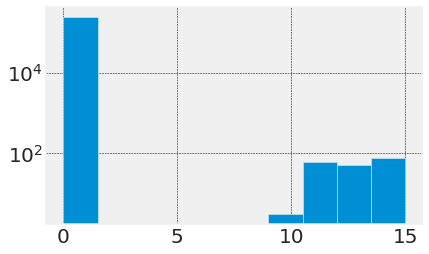

In [17]:
plt.hist(np.nan_to_num(js), range=[0, 15], log=True)

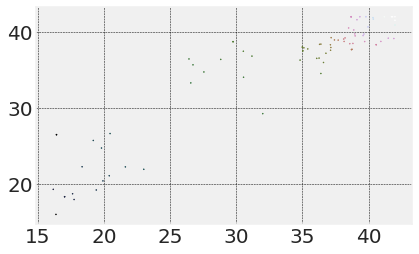

In [18]:
fig, ax=plt.subplots()
ax.scatter(binaries.prim_spt, binaries.sec_spt, c=binaries['abs_2MASS_J'], s=1, 
           vmin=9, vmax=25, cmap='cubehelix')

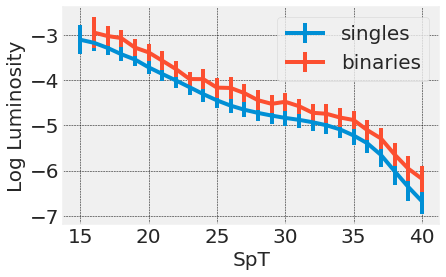

In [19]:
fig, ax=plt.subplots()
sings=group_by_spt(vals.spt[~vals.is_binary],vals.luminosity[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.luminosity[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], yerr=sings['std'], label='singles')
ax.errorbar(bins['grid'], bins['median'], yerr=bins['std'], label='binaries')

ax.set(ylabel='Log Luminosity', xlabel='SpT')
ax.legend()
ax.minorticks_on()

In [20]:
np.nanmedian(-2.5*np.log10((10**sings['median']) /(10**bins['median'])))

0.7360119750456641

In [21]:
get_abs_mag(vals.spt, '2MASS H')[0]

array([18.12294228, 19.73563638, 16.75297789, ..., 14.83168784,
       12.15268784,         nan])

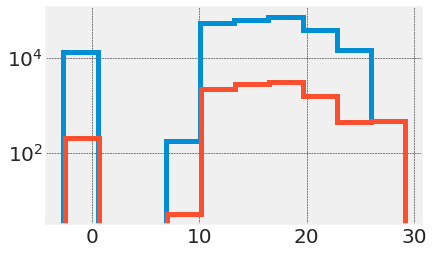

In [22]:
fig, ax=plt.subplots()
hx=plt.hist(vals.abs_2MASS_H.values, log=True, histtype='step', lw=5)
hxy=plt.hist(vals.abs_2MASS_J.values, log=True, histtype='step', lw=5)

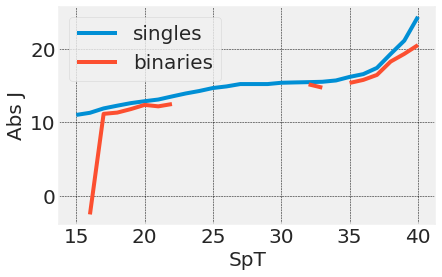

In [23]:
fig, ax=plt.subplots()

sings=group_by_spt(vals.spt[~vals.is_binary],vals.abs_2MASS_J[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.abs_2MASS_J[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles')
ax.errorbar(bins['grid'], bins['median'], label='binaries')
#ax.plot(bins['grid'], get_abs_mag(bins['grid'],'2MASS J')[0], label='pecaut')

ax.set(ylabel='Abs J', xlabel='SpT')
ax.legend()
ax.minorticks_on()



In [24]:
spts=np.arange(15, 41)

In [25]:
np.place(spts, spts>=36, np.ones_like(spts[spts>=36]))

In [26]:
 popsims.abs_mags.absolute_mag_kirkpatrick(spts[spts>=36], '2MASS H')[0]

array([], dtype=float64)

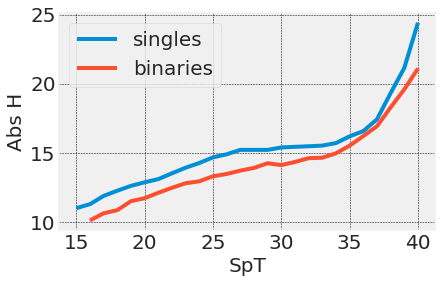

In [27]:
fig, ax=plt.subplots()

sings=group_by_spt(vals.spt[~vals.is_binary],vals.abs_2MASS_H[~vals.is_binary])
bins=group_by_spt(vals.spt[vals.is_binary], vals.abs_2MASS_H[vals.is_binary])

ax.errorbar(sings['grid'], sings['median'], label='singles')
ax.errorbar(bins['grid'], bins['median'], label='binaries')
#ax.plot(bins['grid'], get_abs_mag(bins['grid'],'2MASS H'), label='pecaut')

ax.set(ylabel='Abs H', xlabel='SpT')
ax.legend()
ax.minorticks_on()


(array([ 203.,    0.,    0.,    5., 2236., 2826., 3082., 1542.,  441.,
         471.]),
 array([-2.54768872,  0.62631128,  3.80031128,  6.97431128, 10.14831128,
        13.32231128, 16.49631128, 19.67031128, 22.84431128, 26.01831128,
        29.19231128]),
 <BarContainer object of 10 artists>)

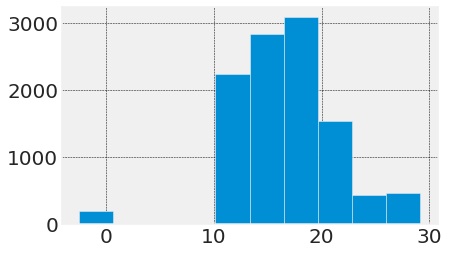

In [28]:
plt.hist(vals.abs_2MASS_H[~vals.is_binary])

In [29]:
np.nanmedian(sings['median']-(bins['median']))

1.1204973319494336

In [30]:
popsims.get_mag_from_luminosity(3, 2, log=True)-popsims.get_mag_from_luminosity(2*3, 2, log=True)

0.7525749891599531

In [31]:
4.74+0.65

5.390000000000001

In [32]:
#hbjk

[Text(0.5, 0, 'Mass ratio'), Text(0, 0.5, ' Log Luminosity (system/primary)')]

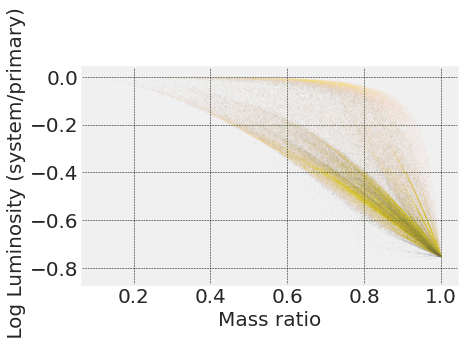

In [33]:
fig, ax=plt.subplots()
h=plt.scatter(vals.sec_mass/vals.pri_mass, \
              -2.5*np.log10(10**vals.luminosity/vals.prim_luminosity), s=1, \
              c=np.log10(vals.age),
              alpha=0.01, cmap='cividis')
ax.set(xlabel='Mass ratio', ylabel=' Log Luminosity (system/primary)')

In [34]:
#fig, ax=plt.subplots()
#plt.scatter(vals['spt'], vals['bolometric_cor_2MASS_J'], alpha=0.01)

In [35]:
#popsims.get_mag_from_luminosity()

In [36]:
#ghjk

In [37]:
#plt.scatter(vals['spt'],\
#         popsims.fillipazzo_bolometric_correction(vals['spt'].values, \
 #                                                 filt='2MASS_J', mask=vals['spt']>39),
 #        s=1, alpha=0.01)


In [38]:
#-2.5*np.log10(10**vals.luminosity/vals.prim_luminosity)

In [39]:
def get_distances(spts):
    return pd.Series({'distanc': np.random.uniform(0, 10, len(spts)),
                     'lol': np.random.uniform(0, 10, len(spts))})

In [40]:
h=350
model='baraffe2003'

In [41]:
str(model)+str(h)+str(h)+'F110_corrected'

'baraffe2003350350F110_corrected'

In [42]:
data_bins=pd.read_hdf(popsims.DATA_FOLDER+'/final_simulated_sample_cut_binaries.h5',\
                      key=str(model)+str(h)+str('spt_abs_mag'))
data=pd.read_hdf(popsims.DATA_FOLDER+'/final_simulated_sample_cut.h5', key=str(model)+str('h')+str(h)+'F110_corrected')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


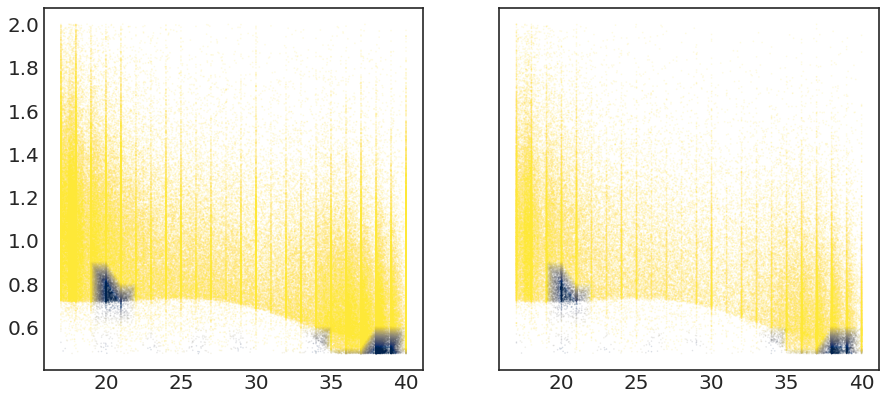

In [43]:
fig, (ax, ax1)=plt.subplots(figsize=(12, 6), ncols=2, sharey=True)


ax.scatter(data_bins['spt'][~data_bins.is_cut.values], 
           np.log10(data_bins['snrj'])[~data_bins.is_cut.values],
           c=data_bins['slprob'][~data_bins.is_cut.values], 
           alpha=0.1, s=1, cmap='cividis')

ax1.scatter(data['spt'], np.log10(data['snr']), c=data['sl'], 
           alpha=0.1, s=1, cmap='cividis')

In [44]:
#count the number of stars
len(vals[vals.is_binary])/len(vals[~vals.is_binary])

0.25

[Text(0.5, 0, 'Spectral Type')]

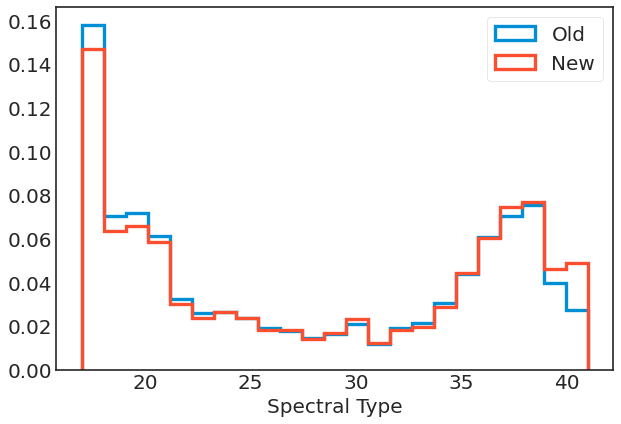

In [45]:
fig, ax=plt.subplots()
h=plt.hist(data['spt'].values, bins=23, histtype='step', lw=3, density=True, label='Old')
h=plt.hist(data_bins['spt'][~data_bins.is_cut.values].values, bins=23,\
           histtype='step', lw=3, label='New', density=True)
plt.legend()
ax.set(xlabel='Spectral Type')

In [46]:
#compare number counts
nobins=pd.read_pickle(popsims.DATA_FOLDER+'/expected_numbers_wisps_no_binaries.pkl')
plusbins=pd.read_pickle(popsims.DATA_FOLDER+'/expected_numbers_wisps_plus_binaries.pkl')

In [47]:
spgrid=[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]

[None, Text(0.5, 0, 'SpT'), Text(0, 0.5, 'Counts')]

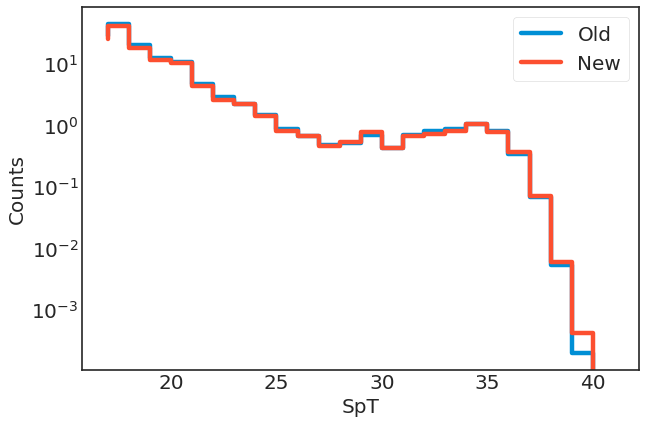

In [48]:
fig, ax=plt.subplots()
ax.step(spgrid, np.array(nobins['densities'][model][5])[:,0]*nobins['volumes'][5], \
        label='Old')
ax.step(spgrid, np.array(plusbins['densities'][model][5])[:,0]*plusbins['volumes'][5], \
        label='New')
#ax.errorbar(spgrid, plusbins['nobs'], yerr= plusbins['nobs']**0.5, c='k', fmt='o')
ax.legend()
ax.set(yscale='log', xlabel='SpT',ylabel='Counts')

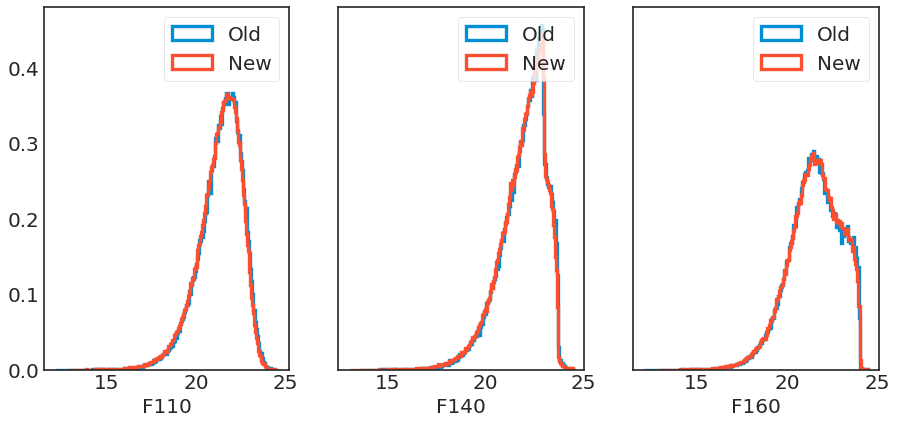

In [49]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    h=a.hist(data['app{}'.format(mag_key.lower())].values, bins='auto', histtype='step', lw=3, density=True, label='Old')
    h=a.hist(data_bins['app{}'.format(mag_key)][~data_bins.is_cut.values].values, bins='auto',\
               histtype='step', lw=3, label='New', density=True)
    a.legend()
    a.set(xlabel=mag_key)

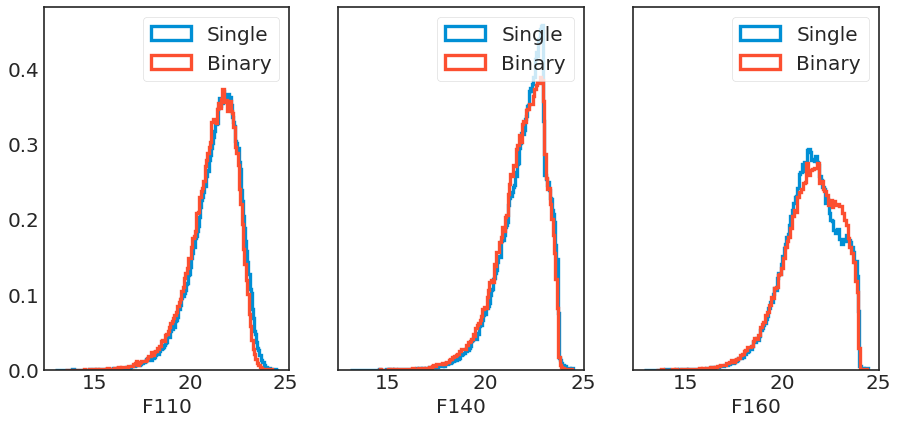

In [50]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    h=a.hist(data_bins['app{}'.format(mag_key)][(~data_bins.is_cut.values) & (~data_bins.is_binary)].values, \
             bins='auto',histtype='step', lw=3, label='Single', density=True)
    h=a.hist(data_bins['app{}'.format(mag_key)][(~data_bins.is_cut.values) & (data_bins.is_binary)].values, \
             bins='auto',histtype='step', lw=3, label='Binary', density=True)
    a.legend()
    a.set(xlabel=mag_key)

In [51]:
data_bins.dist[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values

array([1225.4616038 ,  320.48593758,  367.38805145, ...,  432.79316889,
        624.11376284,  556.10988783])

[Text(0.5, 0, 'Log Distance')]

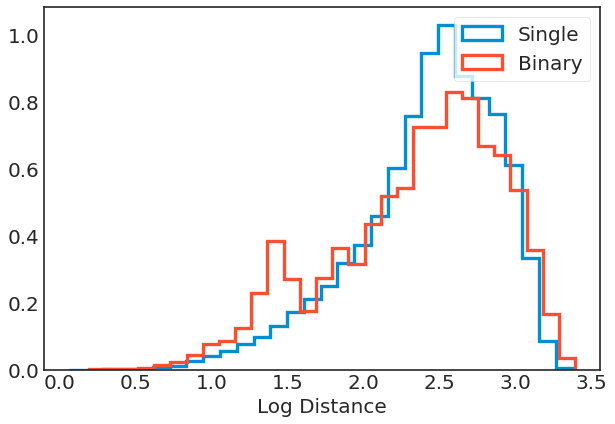

In [72]:
fig, ax=plt.subplots()

h=ax.hist(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values), \
         bins=30,histtype='step', lw=3, label='Single', density=True)
h=ax.hist(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (data_bins.is_binary)].values), \
         bins=30,histtype='step', lw=3, label='Binary', density=True)
ax.legend()
ax.set(xlabel='Log Distance')

In [53]:
ax.hist2d?

No handles with labels found to put in legend.


[Text(0.5, 0, 'Log Distance'), Text(0, 0.5, 'Spectral Type')]

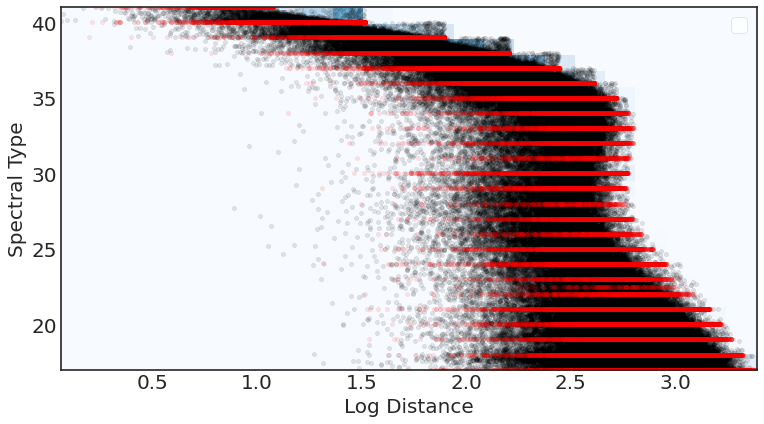

In [54]:
fig, ax=plt.subplots(figsize=(10, 6),  sharex=True, sharey=True)

h=ax.hist2d(np.log10(data_bins.dist[(~data_bins.is_cut.values) ].values).flatten(), \
             data_bins.spt[(~data_bins.is_cut.values) ].values,\
         bins=23, density=True, cmap='Blues')
#h=ax1.hist2d(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (data_bins.is_binary)].values.flatten()), \
#             data_bins.spt[(~data_bins.is_cut.values) & (data_bins.is_binary)].values,\
#         bins=23, density=True, cmap='Blues')

h=ax.scatter(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values).flatten(), \
             data_bins.spt[(~data_bins.is_cut.values) & (~data_bins.is_binary)].values, s=15, c='k', alpha=0.1)

h=ax.scatter(np.log10(data_bins.dist[(~data_bins.is_cut.values) & (data_bins.is_binary)].values.flatten()), \
             data_bins.spt[(~data_bins.is_cut.values) & (data_bins.is_binary)].values,\
          s=15, c='r', alpha=0.1)
ax.legend()
ax.set(xlabel='Log Distance', ylabel='Spectral Type')

In [55]:
cut_flag=data_bins.is_cut.values
bin_flag=data_bins.is_binary.values

[Text(0.5, 0, 'Spectral Type'), Text(0, 0.5, 'Abs H mag')]

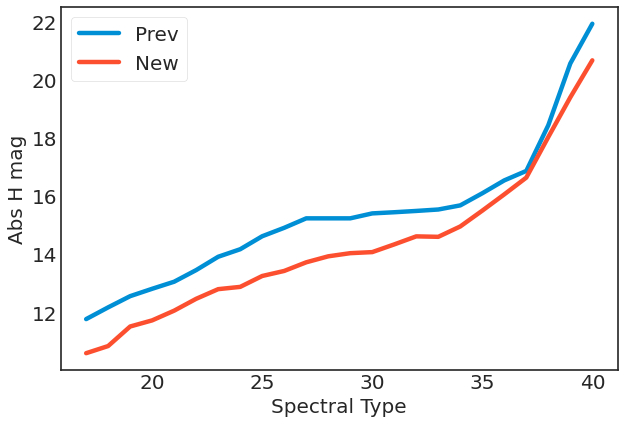

In [56]:
fig, ax=plt.subplots()
prev=group_by_spt(data['spt'].values, popsims.abs_mags.get_abs_mag(data['spt'].values,\
                                                                   '2MASS J')[0])
ne=group_by_spt(data_bins['spt'][~cut_flag], \
                 data_bins['abs_2MASS_H'][~cut_flag])

ne_sing=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, ~bin_flag)], \
                 data_bins['abs_2MASS_H'][np.logical_and(~cut_flag, ~bin_flag)])

ne_bins=group_by_spt(data_bins['spt'][np.logical_and(~cut_flag, bin_flag)], \
                 data_bins['abs_2MASS_H'][np.logical_and(~cut_flag, bin_flag)])

ax.errorbar(prev['grid'], prev['median'],  ms=1, label='Prev')
ax.errorbar(ne['grid'], ne['median'],  ms=1, label='New')
#h=ax.errorbar(ne_sing['grid'], ne_sing['median'],  \
#              yerr= ne_sing['std'], ms=1, label='Ne Singles')
#h=ax.errorbar(ne_bins['grid'], ne_bins['median'],  \
#              yerr= ne_sing['std'], ms=1, label='Ne Binaries')

#ax.plot(ne_sing['grid'], ne_sing['median']-ne_bins['median'])
ax.legend()
ax.minorticks_on()

ax.legend()
ax.set(xlabel='Spectral Type', ylabel='Abs H mag')

In [57]:
 np.nanmedian(ne_sing['median']-ne_bins['median'])

1.1710504485284492

In [58]:
#2.5*np.log10(2)*

In [75]:
data_bins['spt_diff']=data_bins['sec_spt']-data_bins['prim_spt']

[Text(0, 0.5, 'Primary-Secondary Types'), Text(0.5, 0, 'Primary Type')]

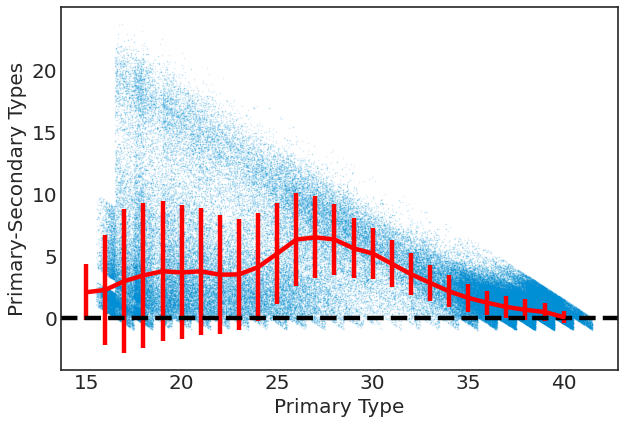

In [104]:
fig, ax=plt.subplots()
prev=group_by_spt(data_bins['prim_spt'],data_bins['spt_diff'])
ax.scatter(data_bins['prim_spt'],data_bins['spt_diff'], s=1, alpha=0.1)
ax.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, c='r')

ax.axhline(0, linestyle='--', c='k')
ax.set(ylabel='Primary-Secondary Types', xlabel='Primary Type')

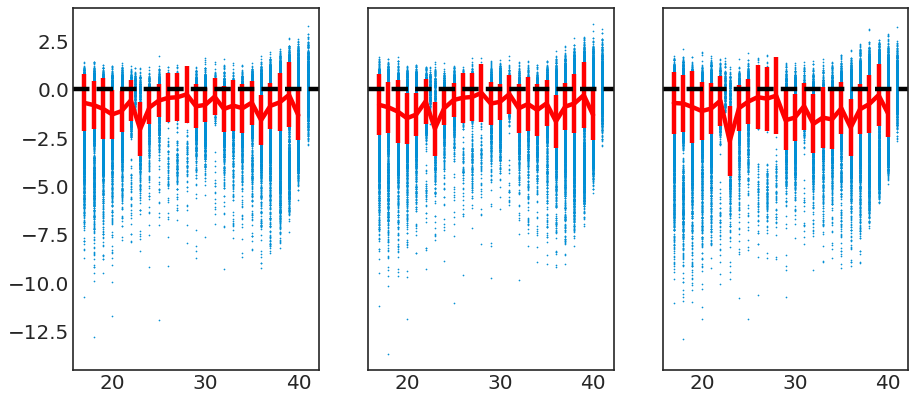

In [107]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    bools=np.logical_and((~data_bins.is_cut.values), (data_bins.is_binary))
    
    diff=data_bins['prim_abs{}'.format(mag_key)]-data_bins['sec_abs{}'.format(mag_key)]
    
    prev=group_by_spt(data_bins['spt'].values[bools], diff[bools])
    a.scatter(data_bins['spt'].values[bools], diff[bools], s=1)
    a.axhline(0, linestyle='--', c='k')
    h=a.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1,  c='r')

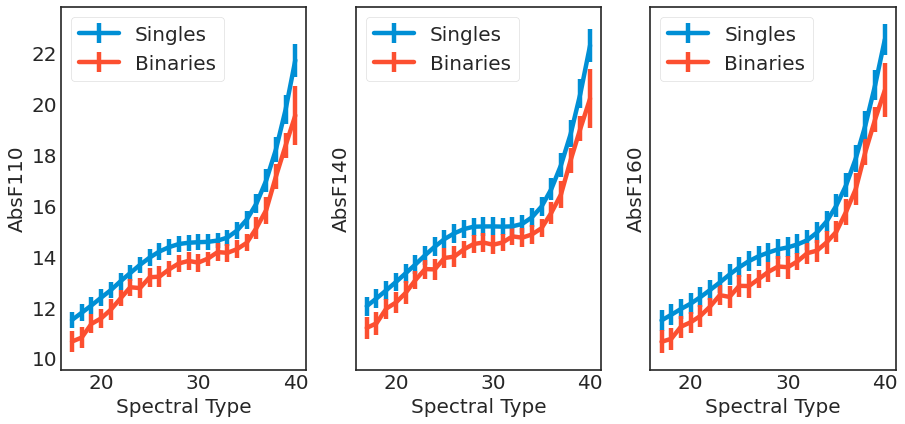

In [73]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    #prev=group_by_spt(data['spt'].values, data[mag_key.lower()].values)
    ne=group_by_spt(data_bins['spt'][~(data_bins.is_cut.values) & (data_bins.is_binary)].values, \
                 data_bins['abs{}'.format(mag_key)][~(data_bins.is_cut.values) & (data_bins.is_binary)].values)
    prev=group_by_spt(data_bins['spt'][~(data_bins.is_cut.values) & (~data_bins.is_binary)].values, \
                 data_bins['abs{}'.format(mag_key)][~(data_bins.is_cut.values) & (~data_bins.is_binary)].values)
    h=a.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, label='Singles')
    h=a.errorbar(ne['grid'], ne['median'],  yerr= ne['std'], ms=1, label='Binaries')
    a.legend()
    a.set(xlabel='Spectral Type', ylabel='Abs{}'.format(mag_key))

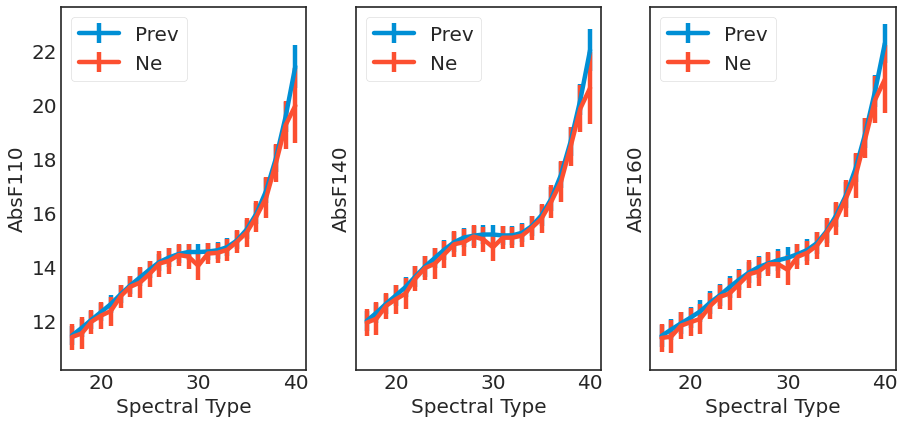

In [60]:
fig, ax=plt.subplots(figsize=(12, 6), ncols= 3, sharey=True)

for a, mag_key in zip(ax, ['F110', 'F140', 'F160']):
    prev=group_by_spt(data['spt'].values, data[mag_key.lower()].values)
    ne=group_by_spt(data_bins['spt'][~data_bins.is_cut.values].values, \
                 data_bins['abs{}'.format(mag_key)][~data_bins.is_cut.values].values)
    h=a.errorbar(prev['grid'], prev['median'], yerr= prev['std'], ms=1, label='Prev')
    h=a.errorbar(ne['grid'], ne['median'],  yerr= ne['std'], ms=1, label='Ne')
    a.legend()
    a.set(xlabel='Spectral Type', ylabel='Abs{}'.format(mag_key))